In [1]:
import numpy as np
import sys
from importlib import reload 
import scipy.interpolate as interp
import scipy.constants as const
import scipy.integrate as integ

import cython
%load_ext Cython

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [2]:
# importing MS and HM modules. Reload modules if needed
try :
    reload(ms_hm.MS)
except :
    print("Did not reload MS module")

try :
    reload(ms_hm.HM)
except :
    print("Did not reload HM module")
    
try :
    reload(ms_hm.QCD_EOS)
except :
    print("Did not reload QCD_EOS module")
    
import ms_hm
from ms_hm.QCD_EOS import *
from ms_hm.MS import *
from ms_hm.HM import *

qcd = QCD_EOS()

Did not reload MS module
Did not reload HM module
Did not reload QCD_EOS module


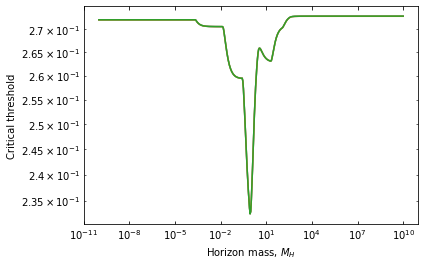

In [33]:
#obtaining deltac and density values
combineddata = np.loadtxt("critical_point_bounds.dat")

combineddata = combineddata[combineddata[:, 0].argsort()]
deltac = (combineddata[:,1] + combineddata[:,2]) / 2
deltac_up = combineddata[:,1]
deltac_low = combineddata[:,2]
rho = combineddata[:,0]

T = qcd.TofRho(rho)
Mhorizon = qcd.MH(T)

Order = Mhorizon.argsort()
Mhorizon = Mhorizon[Order]
deltac = deltac[Order]
deltac = interp.InterpolatedUnivariateSpline(Mhorizon, deltac, ext = 3)
deltac_up = deltac_up[Order]
deltac_up = interp.InterpolatedUnivariateSpline(Mhorizon, deltac_up, ext = 3)
deltac_low = deltac_low[Order]
deltac_low = interp.InterpolatedUnivariateSpline(Mhorizon, deltac_low, ext = 3)

MH_grid = np.logspace(-10,10,500)

plt.loglog(MH_grid, deltac(MH_grid))
plt.loglog(MH_grid, deltac_up(MH_grid))
plt.loglog(MH_grid, deltac_low(MH_grid))
plt.xlabel("Horizon mass, $M_H$");
plt.ylabel("Critical threshold");

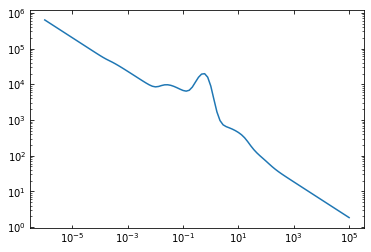

In [61]:
# explicitly write mu in integrand, initializing variables in eq. 26. Once proper unit conversions are found, Mhorizon and Meq will need to be changed. Sigma and gamma will later be made more rigerous

omegaCDM = 0.2589
sigmasquared = 0.003

k = 3.3
gamma = 0.36
Meq = 2.8e17

def mu(M, MH) :
    return M / (k*MH)

# compute integral for a specific M value
def fraction(M):
    return (1/omegaCDM)*integ.simps( 2 / np.sqrt(2*np.pi*sigmasquared) * 
                np.exp(-( mu(M, MH_grid)**(1/gamma) + deltac(MH_grid))**2 / (2*sigmasquared) ) *
                M/(gamma*MH_grid) * mu(M, MH_grid)**(1/gamma) * np.sqrt(Meq/MH_grid),
            np.log(MH_grid)
        )

Ms = np.logspace(-6,5,100)
points = np.array([fraction(m) for m in Ms])
plt.loglog(Ms, points)
# OmegaCDM = integ.simps(points, Ms)
# print("$Omega_{CDM}$ is", OmegaCDM)